In [28]:
!pip install numpy pandas matplotlib tensorflow scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [30]:
try:
   
    url = 'https://raw.githubusercontent.com/maryamfowzer/CodeAlpha_StockPrediction_Model/main/DataSets/portfolio_data.csv'
    data = pd.read_csv(url,date_format=True)
    
    
    print(data.head())
except pd.errors.EmptyDataError:
    print("No data found. The file may be empty.")
except pd.errors.ParserError:
    print("Error parsing the file. Check if the file is a valid CSV.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285


In [31]:
#What was the change in price of the stock overtime?

In [32]:
if 'AMZN' not in data.columns:
    raise ValueError("The dataset must contain an 'AMZN' column.")


amzn_prices = data[['AMZN']].values

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))


scaled_amzn_prices = scaler.fit_transform(amzn_prices)


print(scaled_amzn_prices)

[[0.        ]
 [0.00241169]
 [0.00548211]
 ...
 [0.91652336]
 [0.87895251]
 [0.88868853]]


In [34]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 60


X, y = create_sequences(scaled_amzn_prices, sequence_length)


print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1460, 60, 1), y shape: (1460, 1)


In [35]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (1168, 60, 1), y_train: (1168, 1)
Test set shape: X_test: (292, 60, 1), y_test: (292, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


print(history.history)


Epoch 1/20
30/30 [==============================] - 16s 179ms/step - loss: 0.0039 - val_loss: 5.9404e-04
Epoch 2/20
30/30 [==============================] - 3s 117ms/step - loss: 2.2208e-04 - val_loss: 4.8970e-04
Epoch 3/20
30/30 [==============================] - 4s 122ms/step - loss: 1.5994e-04 - val_loss: 3.8008e-04
Epoch 4/20
30/30 [==============================] - 3s 113ms/step - loss: 1.5011e-04 - val_loss: 7.0835e-04
Epoch 5/20
30/30 [==============================] - 3s 115ms/step - loss: 1.6263e-04 - val_loss: 4.1656e-04
Epoch 6/20
30/30 [==============================] - 4s 139ms/step - loss: 1.5724e-04 - val_loss: 4.2174e-04
Epoch 7/20
30/30 [==============================] - 4s 126ms/step - loss: 1.3621e-04 - val_loss: 4.2456e-04
Epoch 8/20
30/30 [==============================] - 3s 102ms/step - loss: 1.4178e-04 - val_loss: 3.6608e-04
Epoch 9/20
30/30 [==============================] - 3s 99ms/step - loss: 1.3114e-04 - val_loss: 6.1536e-04
Epoch 10/20
30/30 [=============

In [22]:

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

predictions = model.predict(X_test)


predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


print(f"Predictions: {predictions[:5]}")
print(f"True Values: {y_test[:5]}")


10/10 [==============================] - 0s 32ms/step - loss: 0.0024
Test Loss: 0.002369634574279189
10/10 [==============================] - 3s 32ms/step
Predictions: [[1546.399 ]
 [1550.54  ]
 [1550.2787]
 [1550.4845]
 [1550.1948]]
True Values: [[1571.680054]
 [1544.930054]
 [1586.51001 ]
 [1581.859985]
 [1544.920044]]


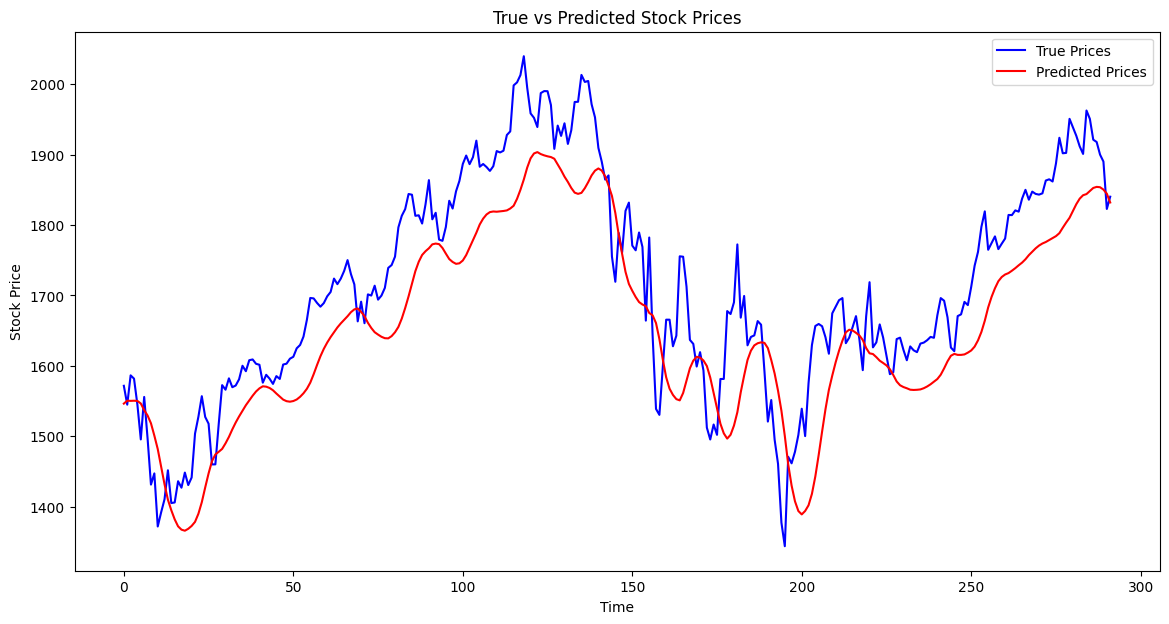

In [23]:
import matplotlib.pyplot as plt


predicted_prices = predictions
true_prices = y_test

comparison_df = pd.DataFrame({'True Prices': true_prices.flatten(), 'Predicted Prices': predicted_prices.flatten()})


plt.figure(figsize=(14, 7))
plt.plot(comparison_df['True Prices'], color='blue', label='True Prices')
plt.plot(comparison_df['Predicted Prices'], color='red', label='Predicted Prices')
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [24]:

num_future_predictions = 10

last_sequence = X_test[-1]


future_predictions = []

for _ in range(num_future_predictions):
    
    last_sequence_reshaped = last_sequence.reshape((1, sequence_length, 1))
    

    next_value = model.predict(last_sequence_reshaped)
    
    
    future_predictions.append(next_value)
    
    
    last_sequence = np.append(last_sequence[1:], next_value)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print(f"Future Predictions: {future_predictions.flatten()}")


1/1 [==============================] - 0s 72ms/step
Future Predictions: [1831.8805 1817.044  1800.3209 1782.3002 1763.4102 1743.9626 1724.1903
 1704.2684 1684.3334 1664.4934]
